<a href="https://colab.research.google.com/github/anjujayapal/ENERGY_CONSUMPTION_ANALYSIS/blob/main/ENERGY_CONSUMPTION_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA CLEANING**

Task 1: Data Importing and Initial Exploration

In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/Projects/Hubblemind/dataset/smart_home_energy_consumption.csv")

In [ ]:
# Check for the presence of a timestamp column
print("Columns in the dataset:")
print(df.columns)


Columns in the dataset:
Index(['Date', 'Home_ID', 'City', 'Energy_Consumption_kWh', 'Occupancy',
       'Temperature_C', 'Humidity_%', 'HVAC_Usage_kWh', 'Kitchen_Usage_kWh',
       'Electronics_Usage_kWh'],
      dtype='object')


In [ ]:
df.describe()

Energy_Consumption_kWh    Occupancy  Temperature_C   Humidity_%  \
count             2450.000000  2500.000000    2450.000000  2450.000000   
mean                 3.515151     0.696000      23.949718    59.877824   
std                  1.373759     0.460075       5.245470    14.790739   
min                 -0.670000     0.000000       7.260000     8.190000   
25%                  2.680000     0.000000      20.432500    49.725000   
50%                  3.500000     1.000000      23.910000    59.660000   
75%                  4.310000     1.000000      27.450000    69.770000   
max                 33.480000     1.000000      49.140000   113.160000   

       HVAC_Usage_kWh  Kitchen_Usage_kWh  Electronics_Usage_kWh  
count     2450.000000        2500.000000            2500.000000  
mean         1.009151           0.799344               0.510372  
std          0.508385           0.405211               0.297242  
min         -1.030000          -0.650000              -0.560000  
25%          0.670000           0.520000               0.310000  
50%          1.020000           0.810000               0.510000  
75%          1.360000           1.080000               0.710000  
max          2.550000           2.310000               1.570000

In [ ]:
# Check the structure of the dfset
print("\nStructure of the dataset:")
print(df.info())

# Display the df types of each column
print("\ndf types of each column:")
print(df.dtypes)

# Display basic statistics for numerical features
print("\nBasic statistics for numerical features:")
print(df.describe())



Structure of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    2500 non-null   object 
 1   Home_ID                 2500 non-null   object 
 2   City                    2500 non-null   object 
 3   Energy_Consumption_kWh  2450 non-null   float64
 4   Occupancy               2500 non-null   int64  
 5   Temperature_C           2450 non-null   float64
 6   Humidity_%              2450 non-null   float64
 7   HVAC_Usage_kWh          2450 non-null   float64
 8   Kitchen_Usage_kWh       2500 non-null   float64
 9   Electronics_Usage_kWh   2500 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 195.4+ KB
None

df types of each column:
Date                       object
Home_ID                    object
City                       object
Energy_Consumption_kWh    float64

In [ ]:
# Convert the timestamp column to datetime format if not already
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])

    # Set the timestamp column as the index
    df.set_index('Date', inplace=True)

    # Check for gaps in the time series
    time_diffs = df.index.to_series().diff().dropna()

    # Check for unique differences between timestamps
    unique_diffs = time_diffs.value_counts()

    print("\nUnique time differences between records:")
    print(unique_diffs)

    # Print the first few differences to understand the interval
    print("\nFirst few time differences:")
    print(time_diffs.head())

    # Check for missing dates
    date_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='H')  # assuming hourly df
    missing_dates = date_range.difference(df.index)

    print("\nNumber of missing dates (if any):")
    print(len(missing_dates))

    if len(missing_dates) > 0:
        print("\nMissing dates:")
        print(missing_dates)
    else:
        print("\nNo missing dates found.")



Unique time differences between records:
Date
50 days 06:00:00      5
-5 days +00:00:00     5
6 days 22:00:00       5
-36 days +12:00:00    5
-4 days +08:00:00     5
                     ..
52 days 11:00:00      1
29 days 09:00:00      1
68 days 10:00:00      1
43 days 10:00:00      1
8 days 13:00:00       1
Name: count, Length: 1835, dtype: int64

First few time differences:
Date
2024-04-06 06:00:00     23 days 00:00:00
2024-01-30 13:00:00   -67 days +07:00:00
2024-03-05 12:00:00     34 days 23:00:00
2024-01-19 00:00:00   -47 days +12:00:00
2024-03-20 22:00:00     61 days 22:00:00
Name: Date, dtype: timedelta64[ns]

Number of missing dates (if any):
0

No missing dates found.


In [ ]:
# Sort the dataframe by the timestamp column
df.sort_index(inplace=True)
print(df.head(3))

# Recalculate time differences after sorting
time_diffs_sorted = df.index.to_series().diff().dropna()

# Display unique time differences after sorting
unique_diffs_sorted = time_diffs_sorted.value_counts()

print("\nUnique time differences after sorting:")
print(unique_diffs_sorted)

# Display the first few time differences after sorting
print("\nFirst few time differences after sorting:")
print(time_diffs_sorted.head())

# Recheck for missing dates
date_range_sorted = pd.date_range(start=df.index.min(), end=df.index.max(), freq='H')  # assuming hourly df
missing_dates_sorted = date_range_sorted.difference(df.index)

print("\nNumber of missing dates (if any) after sorting:")
print(len(missing_dates_sorted))

if len(missing_dates_sorted) > 0:
    print("\nMissing dates after sorting:")
    print(missing_dates_sorted)
else:
    print("\nNo missing dates found after sorting.")


                    Home_ID       City  Energy_Consumption_kWh  Occupancy  \
Date                                                                        
2024-01-01 00:00:00  Home_7  Hyderabad                    3.06          0   
2024-01-01 01:00:00  Home_4       Pune                    3.98          1   
2024-01-01 02:00:00  Home_8    Lucknow                    3.27          1   

                     Temperature_C  Humidity_%  HVAC_Usage_kWh  \
Date                                                             
2024-01-01 00:00:00          23.45       79.19            1.33   
2024-01-01 01:00:00          22.54       51.14           -0.25   
2024-01-01 02:00:00          21.24       85.72            1.19   

                     Kitchen_Usage_kWh  Electronics_Usage_kWh  
Date                                                           
2024-01-01 00:00:00               0.81                   0.25  
2024-01-01 01:00:00               0.18                  -0.23  
2024-01-01 02:00:00        

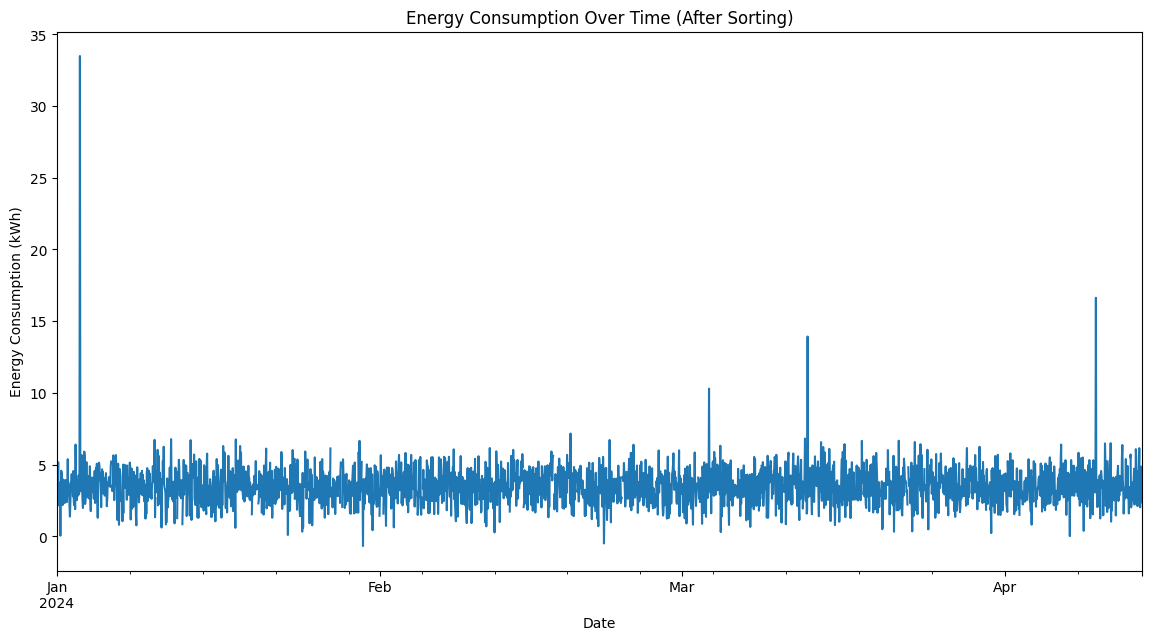

In [ ]:
import matplotlib.pyplot as plt

# Plot the energy consumption over time after sorting
plt.figure(figsize=(14, 7))
df['Energy_Consumption_kWh'].plot()
plt.title('Energy Consumption Over Time (After Sorting)')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (kWh)')
plt.show()


Task 2: Handling Missing Data

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Home_ID                    0
City                       0
Energy_Consumption_kWh    50
Occupancy                  0
Temperature_C             50
Humidity_%                50
HVAC_Usage_kWh            50
Kitchen_Usage_kWh          0
Electronics_Usage_kWh      0
dtype: int64


In [ ]:
# Impute missing values with the median (since these are numerical columns and median is robust to outliers)
df['Energy_Consumption_kWh'].fillna(df['Energy_Consumption_kWh'].median(), inplace=True)
df['Temperature_C'].fillna(df['Temperature_C'].median(), inplace=True)
df['Humidity_%'].fillna(df['Humidity_%'].median(), inplace=True)
df['HVAC_Usage_kWh'].fillna(df['HVAC_Usage_kWh'].median(), inplace=True)

# Removing Home_ID column
df.drop('Home_ID', axis=1, inplace=True)

# Removing City column
df.drop('City', axis=1, inplace=True)
# Verify if missing values are filled
print("Missing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
Energy_Consumption_kWh    0
Occupancy                 0
Temperature_C             0
Humidity_%                0
HVAC_Usage_kWh            0
Kitchen_Usage_kWh         0
Electronics_Usage_kWh     0
dtype: int64


In [ ]:
# Example: Check for negative values in columns where they shouldn't be
negative_values = {column: (df[column] < 0).sum() for column in df.select_dtypes(include=['float64', 'int64']).columns}

print("\nNegative values in numerical columns:")
print(negative_values)

# Example: Check unique values in categorical columns to identify inconsistencies
print("\nUnique values in categorical columns:")
for column in df.select_dtypes(include=['object']).columns:
    print(f"{column}:")
    print(df[column].unique())



Negative values in numerical columns:
{'Energy_Consumption_kWh': 2, 'Occupancy': 0, 'Temperature_C': 0, 'Humidity_%': 0, 'HVAC_Usage_kWh': 53, 'Kitchen_Usage_kWh': 61, 'Electronics_Usage_kWh': 112}

Unique values in categorical columns:


In [ ]:
# Set negative values in the numerical column with median of the column
columns_with_negative_values = ['Energy_Consumption_kWh','HVAC_Usage_kWh','Kitchen_Usage_kWh', 'Electronics_Usage_kWh']
for column in columns_with_negative_values:
    df[column].fillna(df[column].median(), inplace=True)
    df[column] = df[column].clip(lower=0)
# Verify if missing values are filled
print("Missing values after imputation:")
print(df.isnull().sum())

# Verify the changes
print("\nNegative values after handling:")
for column in columns_with_negative_values:
    print(f"{column}: {df[df[column] < 0].shape[0]} negative values")


Missing values after imputation:
Energy_Consumption_kWh    0
Occupancy                 0
Temperature_C             0
Humidity_%                0
HVAC_Usage_kWh            0
Kitchen_Usage_kWh         0
Electronics_Usage_kWh     0
dtype: int64

Negative values after handling:
Energy_Consumption_kWh: 0 negative values
HVAC_Usage_kWh: 0 negative values
Kitchen_Usage_kWh: 0 negative values
Electronics_Usage_kWh: 0 negative values


In [ ]:
df.describe()

Energy_Consumption_kWh    Occupancy  Temperature_C   Humidity_%  \
count             2500.000000  2500.000000    2500.000000  2500.000000   
mean                 3.515312     0.696000      23.948924    59.873468   
std                  1.358647     0.460075       5.192732    14.642057   
min                  0.000000     0.000000       7.260000     8.190000   
25%                  2.700000     0.000000      20.507500    49.982500   
50%                  3.500000     1.000000      23.910000    59.660000   
75%                  4.290000     1.000000      27.392500    69.515000   
max                 33.480000     1.000000      49.140000   113.160000   

       HVAC_Usage_kWh  Kitchen_Usage_kWh  Electronics_Usage_kWh  
count     2500.000000        2500.000000            2500.000000  
mean         1.013840           0.803288               0.516008  
std          0.492162           0.395860               0.285110  
min          0.000000           0.000000               0.000000  
25%          0.680000           0.520000               0.310000  
50%          1.020000           0.810000               0.510000  
75%          1.360000           1.080000               0.710000  
max          2.550000           2.310000               1.570000

Task 3: Outlier Detection and Handling

In [ ]:
# Define a function to identify outliers using the IQR method
def detect_outliers_iqr(df):
    outliers = {}
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]
    return outliers

# Detect outliers in numerical columns
print("\nNumber of outliers in each numerical column:")
outliers = detect_outliers_iqr(df)
print(outliers)



Number of outliers in each numerical column:
{'Energy_Consumption_kWh': 19, 'Occupancy': 0, 'Temperature_C': 23, 'Humidity_%': 20, 'HVAC_Usage_kWh': 13, 'Kitchen_Usage_kWh': 7, 'Electronics_Usage_kWh': 8}


In [ ]:
# Define a function to cap outliers using the IQR method
def cap_outliers_iqr(df):
    capped_df = df.copy()
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        capped_df[column] = capped_df[column].clip(lower=lower_bound, upper=upper_bound)
    return capped_df

# Cap outliers in the dataset
df_capped = cap_outliers_iqr(df)

print("\nFirst few rows of the dataset after capping outliers:")
print(df_capped.head())



First few rows of the dataset after capping outliers:
                     Energy_Consumption_kWh  Occupancy  Temperature_C  \
Date                                                                    
2024-01-01 00:00:00                    3.06          0          23.45   
2024-01-01 01:00:00                    3.98          1          22.54   
2024-01-01 02:00:00                    3.27          1          21.24   
2024-01-01 03:00:00                    5.17          1          24.77   
2024-01-01 04:00:00                    2.17          0          23.78   

                     Humidity_%  HVAC_Usage_kWh  Kitchen_Usage_kWh  \
Date                                                                 
2024-01-01 00:00:00       79.19            1.33               0.81   
2024-01-01 01:00:00       51.14            0.00               0.18   
2024-01-01 02:00:00       85.72            1.19               1.04   
2024-01-01 03:00:00       77.09            0.48               1.01   
2024-01-01 04

In [ ]:
df_capped.describe()

Energy_Consumption_kWh    Occupancy  Temperature_C   Humidity_%  \
count             2500.000000  2500.000000    2500.000000  2500.000000   
mean                 3.496486     0.696000      23.937924    59.875922   
std                  1.168304     0.460075       5.119702    14.542110   
min                  0.315000     0.000000      10.180000    20.683750   
25%                  2.700000     0.000000      20.507500    49.982500   
50%                  3.500000     1.000000      23.910000    59.660000   
75%                  4.290000     1.000000      27.392500    69.515000   
max                  6.675000     1.000000      37.720000    98.813750   

       HVAC_Usage_kWh  Kitchen_Usage_kWh  Electronics_Usage_kWh  
count     2500.000000        2500.000000            2500.000000  
mean         1.013464           0.802684               0.515640  
std          0.491074           0.393941               0.283975  
min          0.000000           0.000000               0.000000  
25%          0.680000           0.520000               0.310000  
50%          1.020000           0.810000               0.510000  
75%          1.360000           1.080000               0.710000  
max          2.380000           1.920000               1.310000

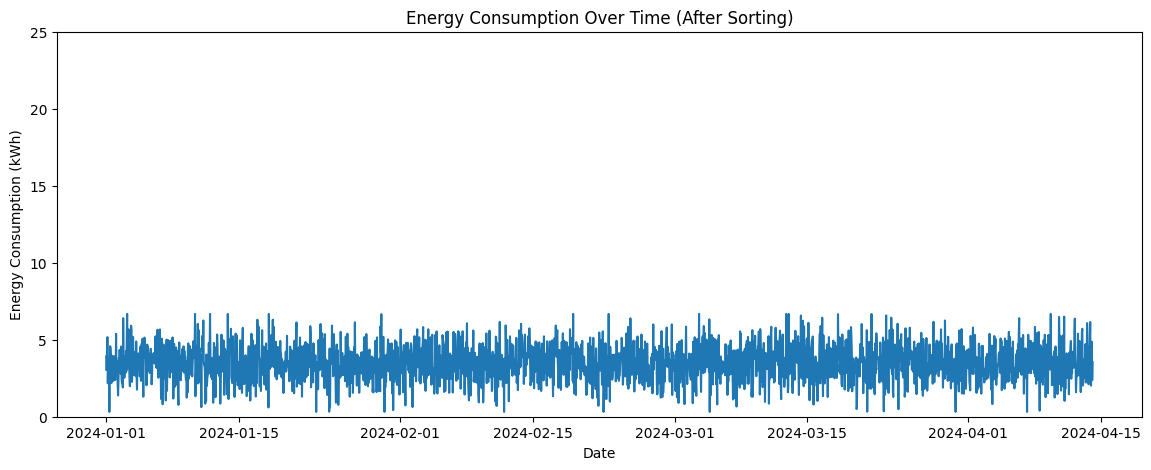

In [ ]:
import matplotlib.pyplot as plt

# Plot the energy consumption over time after sorting
plt.figure(figsize=(14, 5))
plt.plot(df_capped['Energy_Consumption_kWh'])  # Adding markers for better visibility
plt.title('Energy Consumption Over Time (After Sorting)')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (kWh)')

# Set y-axis range and interval
plt.ylim(0, 25)
plt.show()


Task 4: Time-Series Consistency

In [ ]:
import pandas as pd
# Check for duplicate timestamps
duplicate_timestamps = df_capped.index.duplicated(keep=False)
if duplicate_timestamps.any():
    print("Duplicate timestamps found.")
    print(df_capped[duplicate_timestamps])
else:
    print("No duplicate timestamps found.")


No duplicate timestamps found.


In [ ]:
import pandas as pd

# Resample the data to an hourly frequency (or the desired frequency)
df_resampled = df_capped.resample('H').asfreq()

# Check for missing timestamps
missing_timestamps = df_resampled.index[df_resampled.isna().any(axis=1)]

# Output the missing timestamps
if not missing_timestamps.empty:
    print("Missing timestamps found:")
    print(missing_timestamps)
else:
    print("No missing timestamps found.")


No missing timestamps found.


Task 5: Data Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Select relevant features for normalization
features_to_normalize = ['Energy_Consumption_kWh', 'HVAC_Usage_kWh', 'Kitchen_Usage_kWh', 'Electronics_Usage_kWh']

# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))  # This ensures values are scaled between 0 and 1

# Apply Min-Max scaling to the selected features
df_resampled[features_to_normalize] = scaler.fit_transform(df_resampled[features_to_normalize])

# Display the first few rows of the dataset after normalization
print(df_resampled.head())


# Save the normalized data to a new CSV file (optional)
df_resampled.to_csv('normalized_energy_consumption_dataset.csv', index=False)


                     Energy_Consumption_kWh  Occupancy  Temperature_C  \
Date                                                                    
2024-01-01 00:00:00                0.431604          0          23.45   
2024-01-01 01:00:00                0.576258          1          22.54   
2024-01-01 02:00:00                0.464623          1          21.24   
2024-01-01 03:00:00                0.763365          1          24.77   
2024-01-01 04:00:00                0.291667          0          23.78   

                     Humidity_%  HVAC_Usage_kWh  Kitchen_Usage_kWh  \
Date                                                                 
2024-01-01 00:00:00       79.19        0.558824           0.421875   
2024-01-01 01:00:00       51.14        0.000000           0.093750   
2024-01-01 02:00:00       85.72        0.500000           0.541667   
2024-01-01 03:00:00       77.09        0.201681           0.526042   
2024-01-01 04:00:00       52.88        0.294118           0.109375  

In [ ]:
df_resampled.describe()

Energy_Consumption_kWh    Occupancy  Temperature_C   Humidity_%  \
count             2500.000000  2500.000000    2500.000000  2500.000000   
mean                 0.500234     0.696000      23.937924    59.875922   
std                  0.183696     0.460075       5.119702    14.542110   
min                  0.000000     0.000000      10.180000    20.683750   
25%                  0.375000     0.000000      20.507500    49.982500   
50%                  0.500786     1.000000      23.910000    59.660000   
75%                  0.625000     1.000000      27.392500    69.515000   
max                  1.000000     1.000000      37.720000    98.813750   

       HVAC_Usage_kWh  Kitchen_Usage_kWh  Electronics_Usage_kWh  
count     2500.000000        2500.000000            2500.000000  
mean         0.425825           0.418065               0.393618  
std          0.206334           0.205177               0.216775  
min          0.000000           0.000000               0.000000  
25%          0.285714           0.270833               0.236641  
50%          0.428571           0.421875               0.389313  
75%          0.571429           0.562500               0.541985  
max          1.000000           1.000000               1.000000

**EXPLORATORY DATA ANALYSIS (EDA) & VISUALIZATIONS**

Focus: Gaining insights and understanding relationships within the data.


Task 1: Univariate Analysis

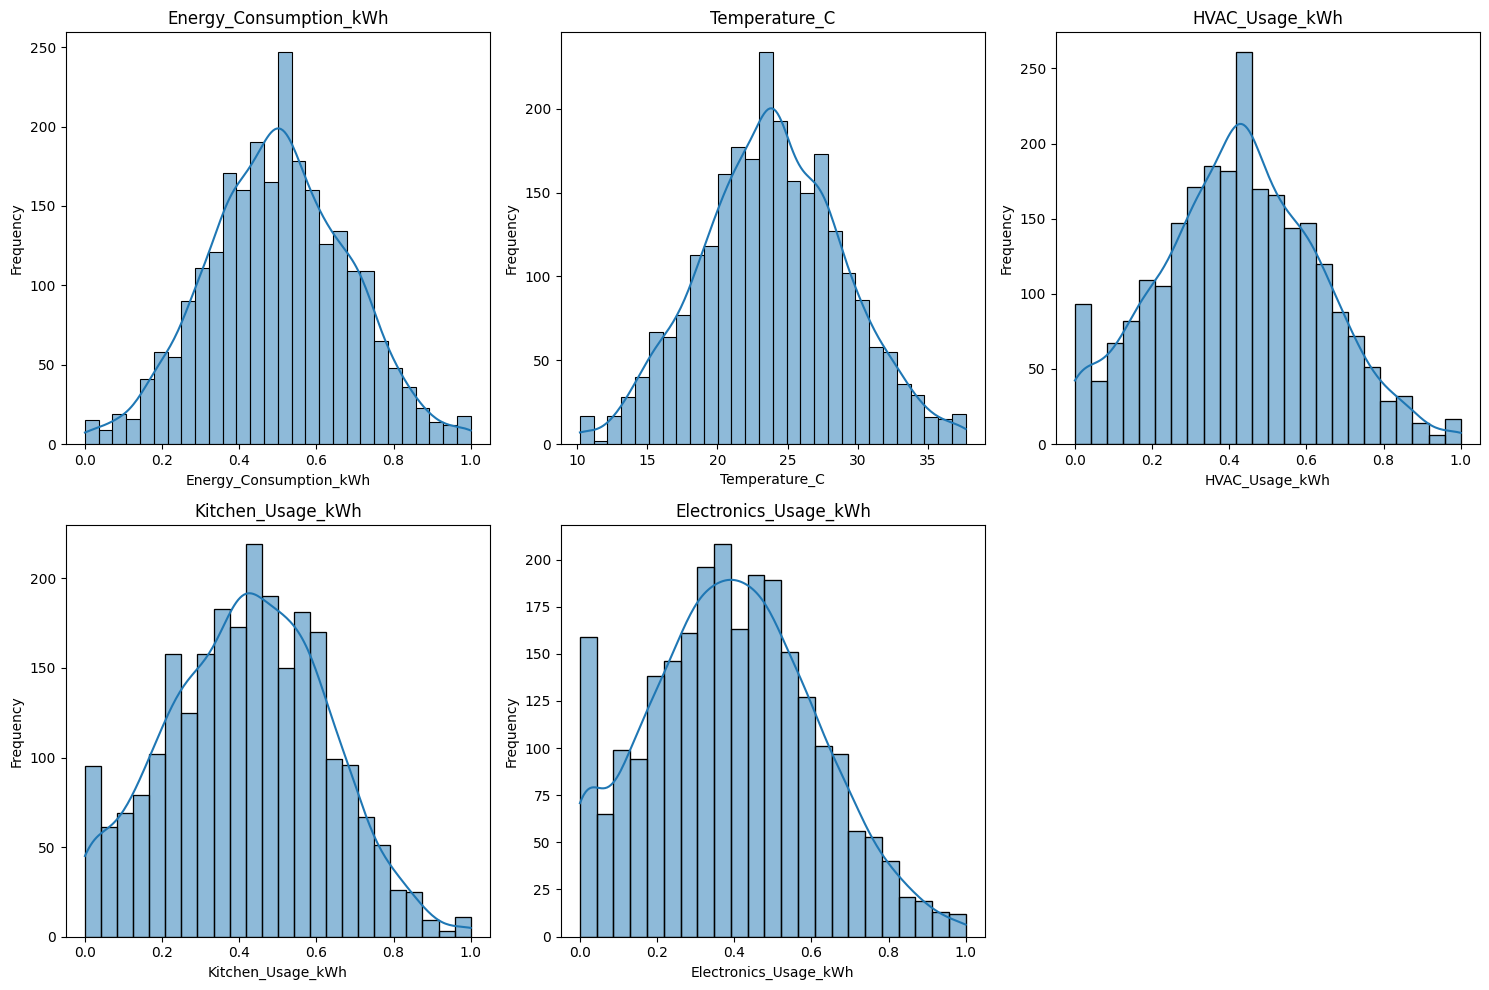

In [ ]:
import seaborn as sns
# Distribution of each  values
plt.figure(figsize=(15, 10))
# List of features to plot
features = ['Energy_Consumption_kWh', 'Temperature_C', 'HVAC_Usage_kWh', 'Kitchen_Usage_kWh', 'Electronics_Usage_kWh']
# Plotting histograms for each feature
for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.histplot(df_resampled[feature], kde=True)
    plt.title(f'{feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

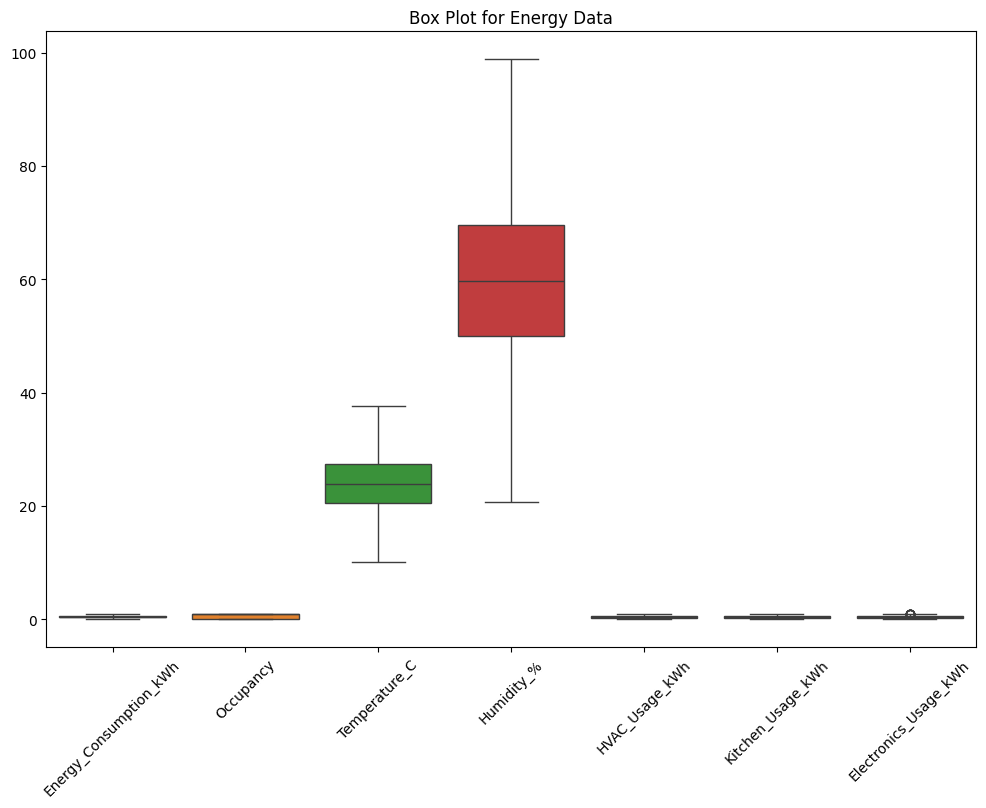

In [ ]:
# Plotting box plots for each numeric column
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_resampled[['Energy_Consumption_kWh', 'Occupancy', 'Temperature_C',
                            'Humidity_%', 'HVAC_Usage_kWh', 'Kitchen_Usage_kWh',
                            'Electronics_Usage_kWh']])
plt.xticks(rotation=45)
plt.title("Box Plot for Energy Data")
plt.show()

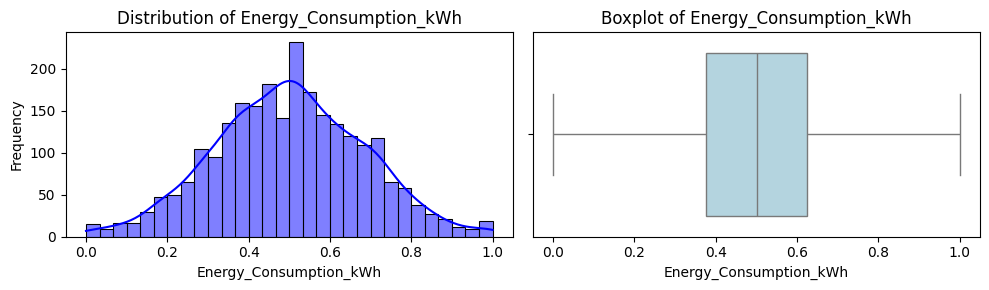


Summary Statistics for Energy_Consumption_kWh:
count    2500.000000
mean        0.500234
std         0.183696
min         0.000000
25%         0.375000
50%         0.500786
75%         0.625000
max         1.000000
Name: Energy_Consumption_kWh, dtype: float64


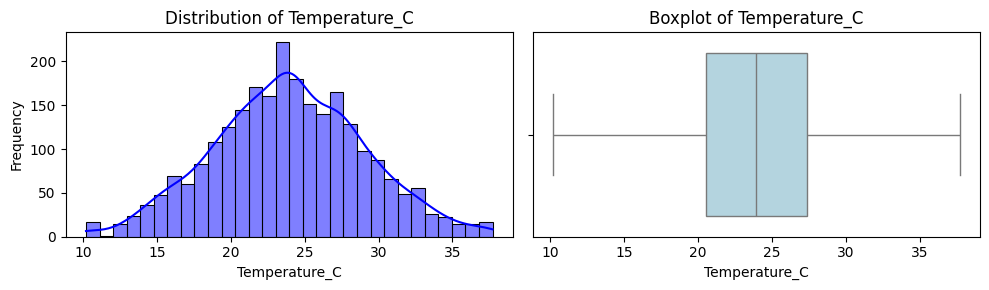


Summary Statistics for Temperature_C:
count    2500.000000
mean       23.937924
std         5.119702
min        10.180000
25%        20.507500
50%        23.910000
75%        27.392500
max        37.720000
Name: Temperature_C, dtype: float64


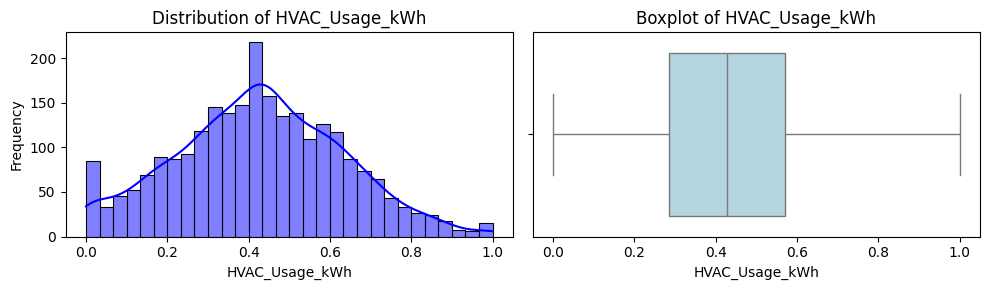


Summary Statistics for HVAC_Usage_kWh:
count    2500.000000
mean        0.425825
std         0.206334
min         0.000000
25%         0.285714
50%         0.428571
75%         0.571429
max         1.000000
Name: HVAC_Usage_kWh, dtype: float64


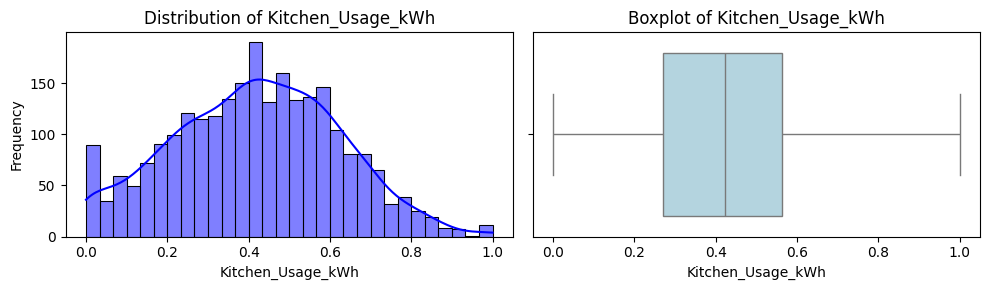


Summary Statistics for Kitchen_Usage_kWh:
count    2500.000000
mean        0.418065
std         0.205177
min         0.000000
25%         0.270833
50%         0.421875
75%         0.562500
max         1.000000
Name: Kitchen_Usage_kWh, dtype: float64


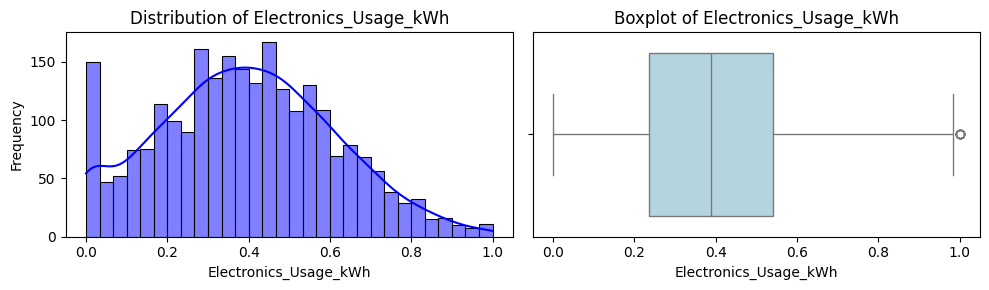


Summary Statistics for Electronics_Usage_kWh:
count    2500.000000
mean        0.393618
std         0.216775
min         0.000000
25%         0.236641
50%         0.389313
75%         0.541985
max         1.000000
Name: Electronics_Usage_kWh, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of key features for univariate analysis
key_features = ['Energy_Consumption_kWh', 'Temperature_C', 'HVAC_Usage_kWh', 'Kitchen_Usage_kWh', 'Electronics_Usage_kWh']

# Loop through each feature and plot histograms and boxplots
for feature in key_features:
    plt.figure(figsize=(10, 3))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_resampled[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_resampled[feature], color='lightblue')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)

    # Show plots
    plt.tight_layout()
    plt.show()

    # Summary statistics
    print(f'\nSummary Statistics for {feature}:')
    print(df_resampled[feature].describe())


Task 2: Bivariate and Multivariate Analysis

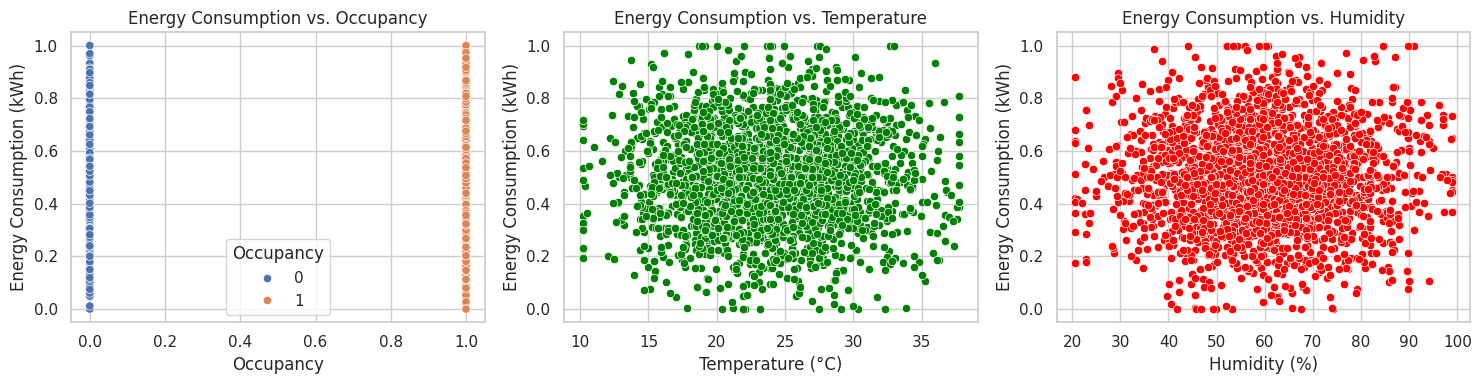

In [ ]:
# Bivariate analysis

plt.figure(figsize=(15, 4))
# Scatter plot for Energy Consumption vs. Occupancy
from turtle import color
plt.subplot(1,3,1)
sns.scatterplot(x='Occupancy', y='Energy_Consumption_kWh', data=df_resampled,hue='Occupancy')
plt.title('Energy Consumption vs. Occupancy')
plt.xlabel('Occupancy')
plt.ylabel('Energy Consumption (kWh)')

# Scatter plot for Energy Consumption vs. Temperature
plt.subplot(1,3,2)
sns.scatterplot(x='Temperature_C', y='Energy_Consumption_kWh', data=df_resampled,color='Green')
plt.title('Energy Consumption vs. Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Energy Consumption (kWh)')

# Scatter plot for Energy Consumption vs. Humidity
plt.subplot(1,3,3)
sns.scatterplot(x='Humidity_%', y='Energy_Consumption_kWh', data=df_resampled,color='Red')
plt.title('Energy Consumption vs. Humidity')
plt.xlabel('Humidity (%)')
plt.ylabel('Energy Consumption (kWh)')

# Show plots
plt.tight_layout()
plt.show()



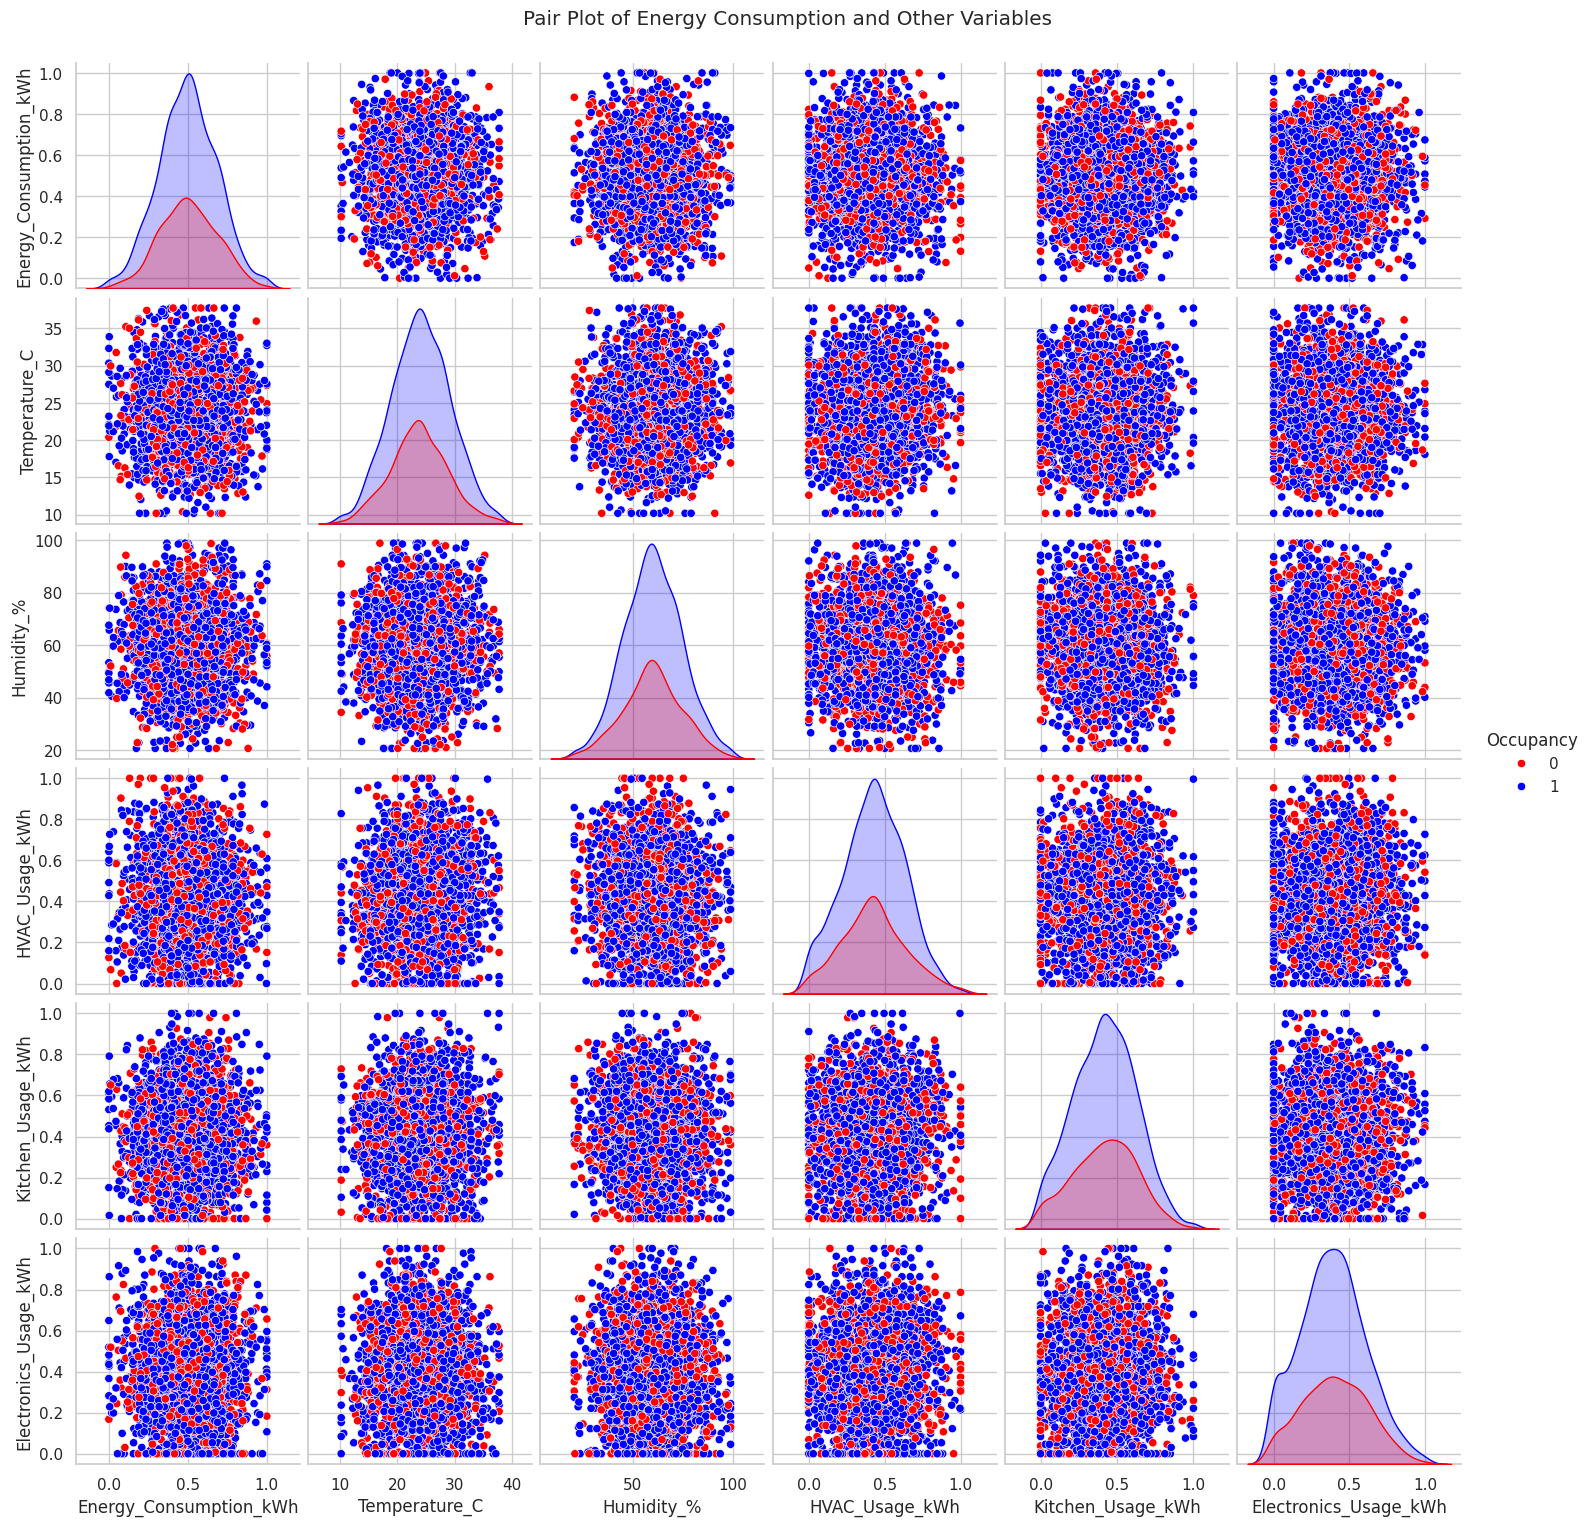

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette
custom_palette = {0: 'red', 1: 'blue'}  # Example colors for binary Occupancy values

# Create a pair plot with custom colors
sns.pairplot(df_resampled, hue='Occupancy', palette=custom_palette)

# Set the title of the plot
plt.suptitle('Pair Plot of Energy Consumption and Other Variables', y=1.02)

# Show the plot
plt.show()


In [ ]:
df_resampled.columns

Index(['Energy_Consumption_kWh', 'Occupancy', 'Temperature_C', 'Humidity_%',
       'HVAC_Usage_kWh', 'Kitchen_Usage_kWh', 'Electronics_Usage_kWh'],
      dtype='object')

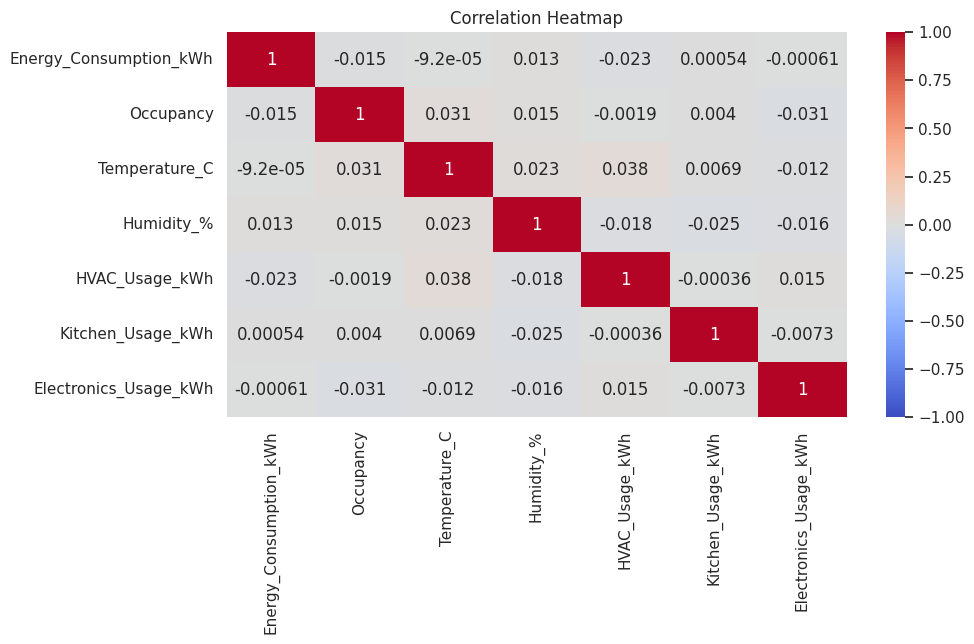

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 5))
correlation_matrix = df_resampled[[ 'Energy_Consumption_kWh', 'Occupancy', 'Temperature_C',
       'Humidity_%', 'HVAC_Usage_kWh', 'Kitchen_Usage_kWh',
       'Electronics_Usage_kWh']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

Task 3: Time-Series Analysis

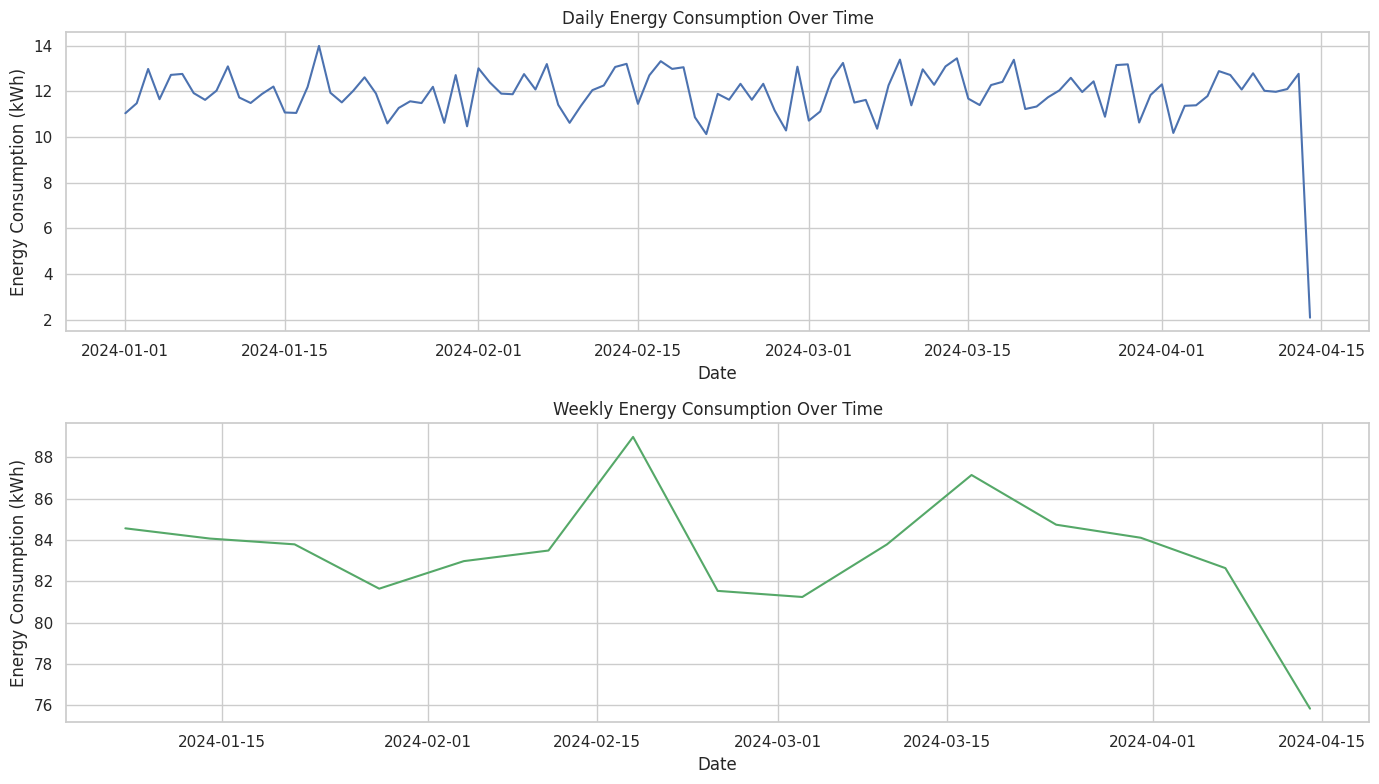

In [ ]:
# Time series analysis
# Analyze energy consumption trends over time (e.g., daily, weekly patterns

# Resample the data to daily and weekly frequency
daily_energy = df_resampled['Energy_Consumption_kWh'].resample('D').sum()
weekly_energy = df_resampled['Energy_Consumption_kWh'].resample('W').sum()

# Plot daily and weekly energy consumption trends
plt.figure(figsize=(14, 8))

# Daily Energy Consumption
plt.subplot(2, 1, 1)
plt.plot(daily_energy, label='Daily Energy Consumption', color='b')
plt.title('Daily Energy Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (kWh)')
plt.grid(True)

# Weekly Energy Consumption
plt.subplot(2, 1, 2)
plt.plot(weekly_energy, label='Weekly Energy Consumption', color='g')
plt.title('Weekly Energy Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (kWh)')
plt.grid(True)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

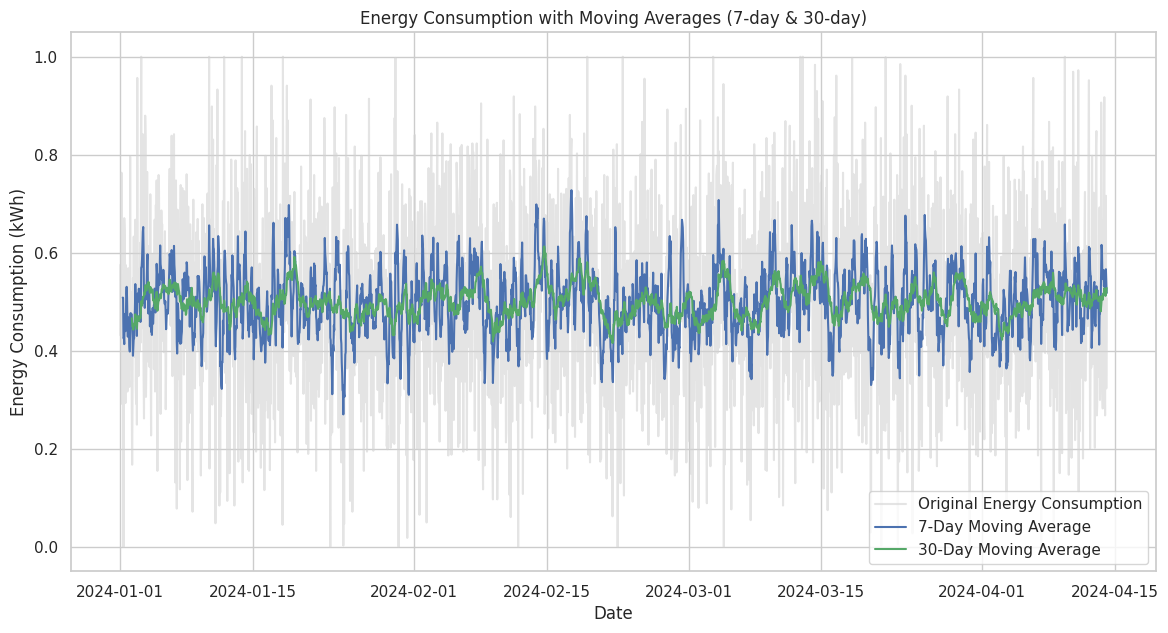

In [ ]:
# Moving Average to Identify Trends and Seasonality
# 7-day moving average (weekly trend)
df_resampled['7_day_MA'] = df_resampled['Energy_Consumption_kWh'].rolling(window=7).mean()

# 30-day moving average (monthly trend)
df_resampled['30_day_MA'] = df_resampled['Energy_Consumption_kWh'].rolling(window=30).mean()

# Plot the moving averages along with original data
plt.figure(figsize=(14, 7))
plt.plot(df_resampled['Energy_Consumption_kWh'], label='Original Energy Consumption', color='lightgray', alpha=0.6)
plt.plot(df_resampled['7_day_MA'], label='7-Day Moving Average', color='b')
plt.plot(df_resampled['30_day_MA'], label='30-Day Moving Average', color='g')
plt.title('Energy Consumption with Moving Averages (7-day & 30-day)')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (kWh)')
plt.legend()
plt.grid(True)
plt.show()


<Figure size 2500x1000 with 0 Axes>

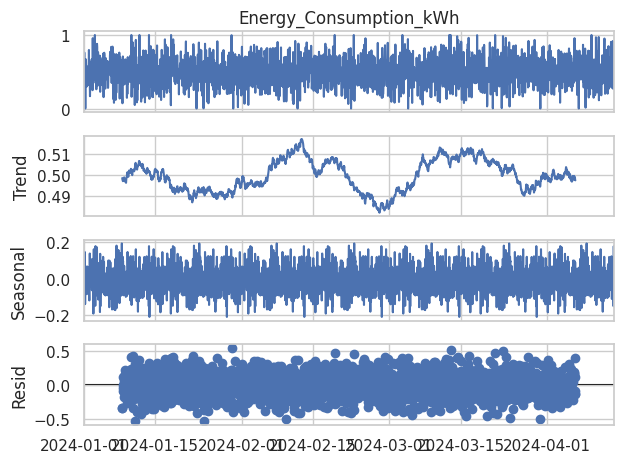

In [ ]:
# Optional: Seasonal Decomposition using statsmodels
import statsmodels.api as sm

# Seasonal Decomposition (multiplicative model)
decomposition = sm.tsa.seasonal_decompose(df_resampled['Energy_Consumption_kWh'], model='additive', period=365)

# Plot decomposed components: trend, seasonal, and residual
plt.figure(figsize=(25, 10))
decomposition.plot()
plt.show()

Task 4: Feature Engineering

In [ ]:
# creating new features from existing features

# Calculate Energy_per_Occupant_kWh only for rows where Occupancy is 1 or greater
df_resampled['Energy_per_Occupant_kWh'] = df_resampled['Energy_Consumption_kWh'] / df_resampled['Occupancy']
df_resampled.loc[df_resampled['Occupancy'] == 0, 'Energy_per_Occupant_kWh'] = 0

# Calculate the mean temperature
mean_temperature = df_resampled['Temperature_C'].mean()

# Create the Temperature Difference feature
df_resampled['Temperature_Difference_C'] = (df_resampled['Temperature_C'] - mean_temperature).abs()

# Sample the DataFrame to see the changes

df_resampled.sample()


Energy_Consumption_kWh  Occupancy  Temperature_C  \
Date                                                                    
2024-03-03 12:00:00                0.430031          1           24.8   

                     Humidity_%  HVAC_Usage_kWh  Kitchen_Usage_kWh  \
Date                                                                 
2024-03-03 12:00:00       71.99        0.508403           0.291667   

                     Electronics_Usage_kWh  7_day_MA  30_day_MA  \
Date                                                              
2024-03-03 12:00:00               0.145038  0.456761   0.463155   

                     Energy_per_Occupant_kWh  Temperature_Difference_C  
Date                                                                    
2024-03-03 12:00:00                 0.430031                  0.862076

Task 5: Advanced Visualizations

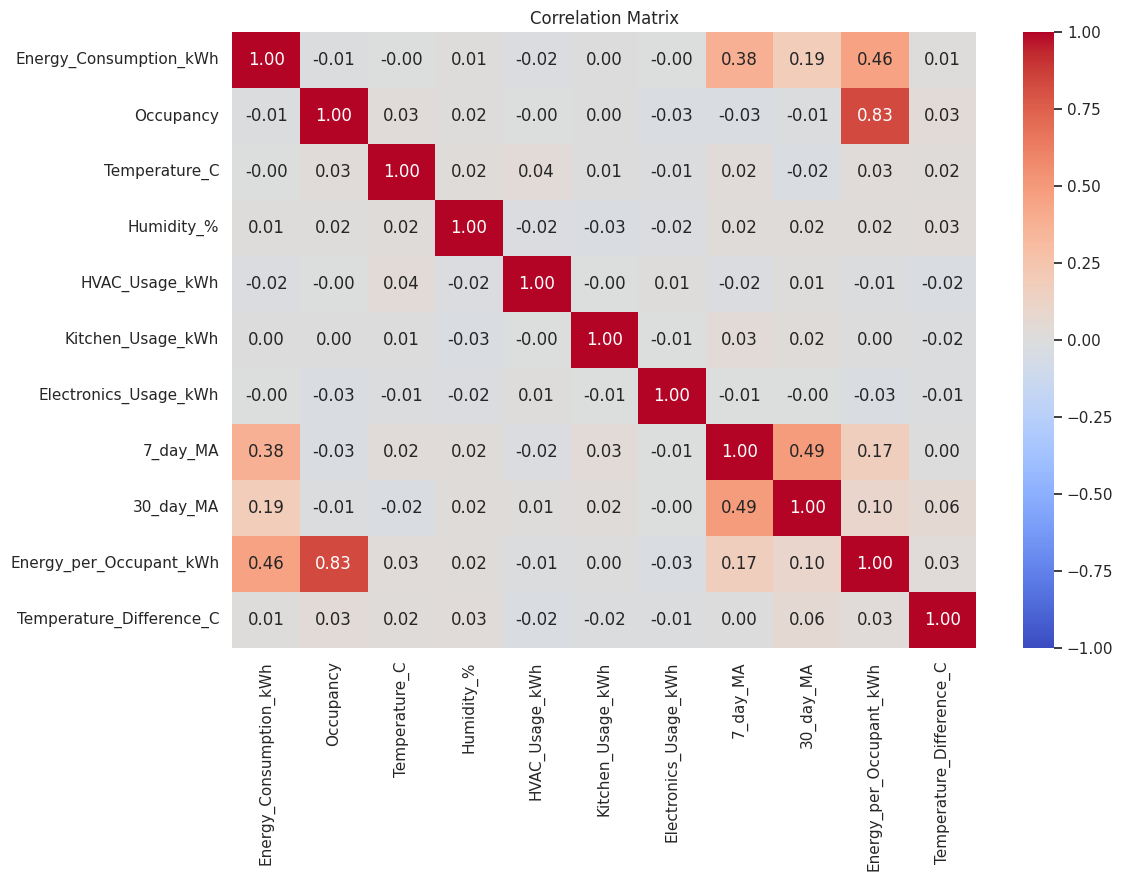

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df_resampled.select_dtypes(include=['number']).corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

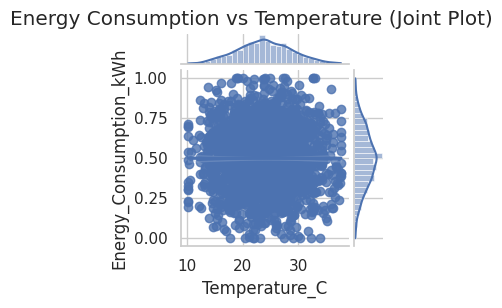

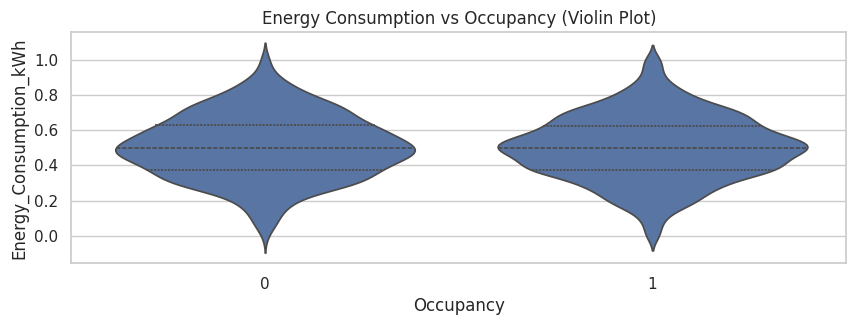

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import plotly.express as px
# Adding a constant to ensure no zeros or negatives
df_resampled['marker_size'] = df_resampled['Energy_Consumption_kWh'].apply(lambda x: abs(x) + 0.1)


# Ensure all size values are positive, use absolute values
df_resampled['marker_size'] = abs(df_resampled['Energy_Consumption_kWh'])

# Interactive Scatter Plot using Plotly - Energy Consumption vs Humidity
fig = px.scatter(df_resampled, x='Humidity_%', y='Energy_Consumption_kWh',
                 color='Occupancy', size='marker_size',
                 title='Energy Consumption vs Humidity (Interactive)',
                 labels={'Humidity_%':'Humidity (%)', 'Energy_Consumption_kWh':'Energy Consumption (kWh)'})
fig.show()


# Joint Plot - Energy Consumption vs Temperature
sns.jointplot(x='Temperature_C', y='Energy_Consumption_kWh', data=df_resampled, kind='reg', height=3)
plt.suptitle('Energy Consumption vs Temperature (Joint Plot)', y=1.02)
plt.show()

# Violin Plot - Energy Consumption vs Occupancy
plt.figure(figsize=(10, 3))
sns.violinplot(x='Occupancy', y='Energy_Consumption_kWh', data=df_resampled, inner='quartile')
plt.title('Energy Consumption vs Occupancy (Violin Plot)')
plt.show()

# Interactive Scatter Plot using Plotly - Energy Consumption vs Humidity
fig = px.scatter(df_resampled, x='Humidity_%', y='Energy_Consumption_kWh',
                 color='Occupancy', size='Energy_Consumption_kWh',
                 title='Energy Consumption vs Humidity (Interactive)',
                 labels={'Humidity_%':'Humidity (%)', 'Energy_Consumption_kWh':'Energy Consumption (kWh)'})
fig.show()

# Interactive Line Plot using Plotly - Energy Consumption Over Time
fig2 = px.line(df_resampled, x=df_resampled.index, y='Energy_Consumption_kWh',
               title='Energy Consumption Over Time (Interactive)',
               labels={'index':'Time', 'Energy_Consumption_kWh':'Energy Consumption (kWh)'})
fig2.show()


In [ ]:
# Drop the marker_size column from the dataframe
df_resampled = df_resampled.drop(columns=['marker_size'])


In [ ]:
df_resampled.columns

Index(['Energy_Consumption_kWh', 'Occupancy', 'Temperature_C', 'Humidity_%',
       'HVAC_Usage_kWh', 'Kitchen_Usage_kWh', 'Electronics_Usage_kWh',
       '7_day_MA', '30_day_MA', 'Energy_per_Occupant_kWh',
       'Temperature_Difference_C'],
      dtype='object')

In [ ]:
df_resampled.isnull().sum()

Energy_Consumption_kWh       0
Occupancy                    0
Temperature_C                0
Humidity_%                   0
HVAC_Usage_kWh               0
Kitchen_Usage_kWh            0
Electronics_Usage_kWh        0
7_day_MA                     6
30_day_MA                   29
Energy_per_Occupant_kWh      0
Temperature_Difference_C     0
dtype: int64

**MACHINE LEARNING**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assume 'df_resampled' is the time-series dataset, and it is already sorted by time

# Determine the split index based on an 80/20 split
split_ratio = 0.8
split_index = int(len(df_resampled) * split_ratio)

# Split the dataset into training and testing sets without shuffling
train_data = df_resampled.iloc[:split_index]  # Training set (80%)
test_data = df_resampled.iloc[split_index:]   # Testing set (20%)

x_train = train_data.drop(['Energy_Consumption_kWh'],axis=1)
y_train = train_data['Energy_Consumption_kWh']
x_test = test_data.drop(['Energy_Consumption_kWh'],axis=1)
y_test = test_data['Energy_Consumption_kWh']

# Display the sizes of the training and testing sets
print(f"Training set size: {len(train_data)}")
print(f"Testing set size: {len(test_data)}")

# Optional: check the time ranges for both sets to ensure continuity
print(f"Training set time range: {train_data.index.min()} to {train_data.index.max()}")
print(f"Testing set time range: {test_data.index.min()} to {test_data.index.max()}")


Training set size: 2000
Testing set size: 500
Training set time range: 2024-01-01 00:00:00 to 2024-03-24 07:00:00
Testing set time range: 2024-03-24 08:00:00 to 2024-04-14 03:00:00


LINEAR REGRESSION


Linear Regression Model Evaluation Metrics:
Mean Absolute Error (MAE)    : 0.05
Mean Squared Error (MSE)     : 0.01
Root Mean Squared Error (RMSE): 0.09
R-squared (R²)               : 0.7385


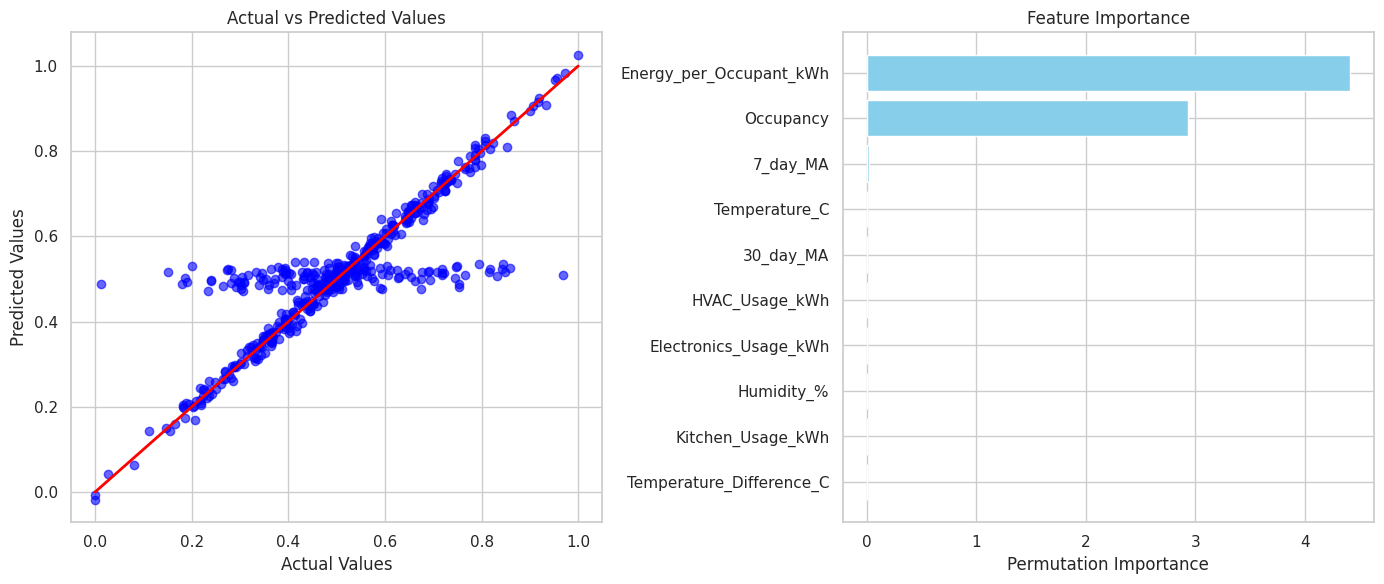

In [ ]:
## LINEAR REGRESSION

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.inspection import permutation_importance

# Features to be scaled (excluding 'Occupancy' as it is binary)
numeric_features = ['Temperature_C', 'Humidity_%',
       'HVAC_Usage_kWh', 'Kitchen_Usage_kWh', 'Electronics_Usage_kWh',
       '7_day_MA', '30_day_MA', 'Energy_per_Occupant_kWh',
       'Temperature_Difference_C']
binary_features = ['Occupancy']  # Binary feature that should remain unscaled

# Define imputation strategies for different types of features
numeric_imputer = SimpleImputer(strategy='mean')  # You can use 'median' or other strategies if needed

# Define a column transformer
preprocessor = ColumnTransformer(transformers=[
    ('num', Pipeline(steps=[
        ('imputer', numeric_imputer),  # Handle missing values for numeric features
        ('scaler', StandardScaler())  # Standardize numeric features
    ]), numeric_features),
    ('bin', 'passthrough', binary_features)  # Pass through binary features without scaling
])

# Initialize Linear Regression model
linear_model = LinearRegression()

# Define the pipeline
pipeline_linear = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', linear_model)  # Apply linear regression
])

# Fit the pipeline to the training data
pipeline_linear.fit(x_train, y_train)

# Make predictions
y_pred_linear = pipeline_linear.predict(x_test)

# Evaluate the model
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = mse_linear**0.5  # Square root of MSE
r2_linear = r2_score(y_test, y_pred_linear)

# Fancy output
print("\nLinear Regression Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE)    : {mae_linear:,.2f}")
print(f"Mean Squared Error (MSE)     : {mse_linear:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_linear:,.2f}")
print(f"R-squared (R²)               : {r2_linear:.4f}")

# Permutation importance
result_linear = permutation_importance(pipeline_linear, x_test, y_test, n_repeats=10, random_state=42)

# Sort by importance
sorted_idx_linear = result_linear.importances_mean.argsort()

# Create the plots
plt.figure(figsize=(14, 6))

# Subplot 1: Scatter plot of actual vs predicted values
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Reference line y=x
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Subplot 2: Permutation importance plot
plt.subplot(1, 2, 2)
plt.barh(x_test.columns[sorted_idx_linear], result_linear.importances_mean[sorted_idx_linear], color='skyblue')
plt.xlabel("Permutation Importance")
plt.title("Feature Importance")

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()



RIDGE REGRESSION


Model Evaluation Metrics:
Mean Absolute Error (MAE)    : 0.05
Mean Squared Error (MSE)     : 0.01
Root Mean Squared Error (RMSE): 0.09
R-squared (R²)               : 0.7386


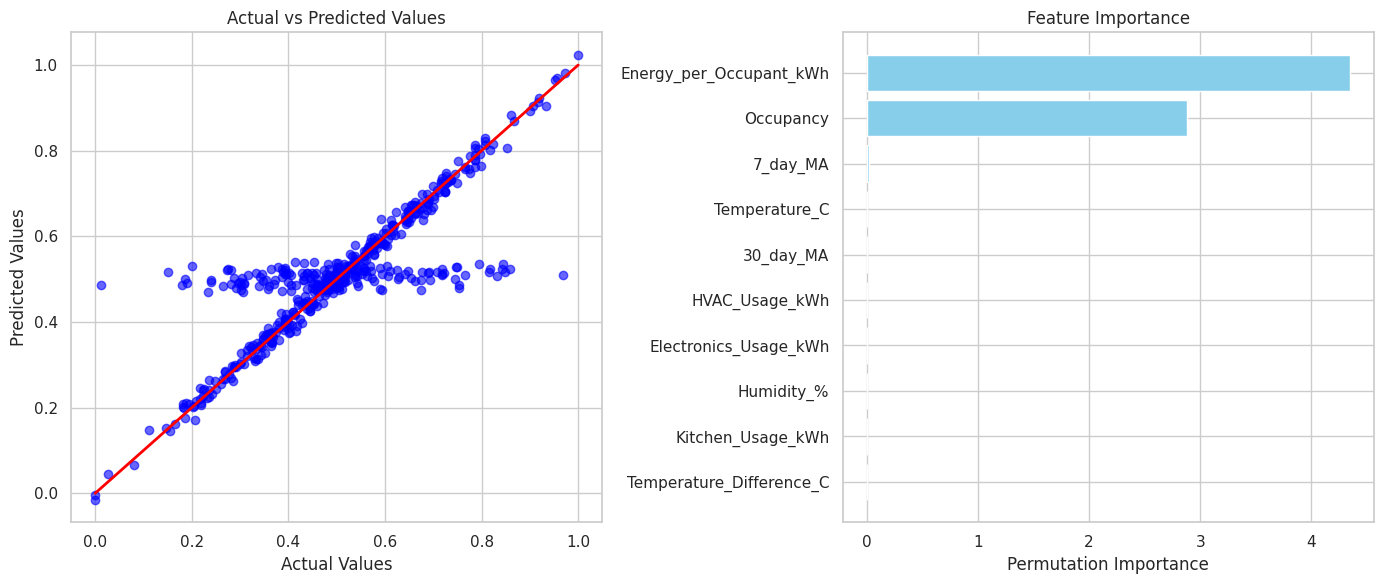

In [ ]:
## RIDGE REGRESSION MODEL

# Features to be scaled (excluding 'Occupancy' as it is binary)
numeric_features = ['Temperature_C', 'Humidity_%',
       'HVAC_Usage_kWh', 'Kitchen_Usage_kWh', 'Electronics_Usage_kWh',
       '7_day_MA', '30_day_MA', 'Energy_per_Occupant_kWh',
       'Temperature_Difference_C']
binary_features = ['Occupancy']  # Binary feature that should remain unscaled

# Define imputation strategies for different types of features
numeric_imputer = SimpleImputer(strategy='mean')  # You can use 'median' or other strategies if needed
# Define a column transformer
preprocessor = ColumnTransformer(transformers=[
    ('num', Pipeline(steps=[
        ('imputer', numeric_imputer),  # Handle missing values for numeric features
        ('scaler', StandardScaler())  # Standardize numeric features
    ]), numeric_features),
    ('bin', 'passthrough', binary_features)  # Pass through binary features without scaling
])

ridge_model = Ridge(alpha=1.0)
# Define the pipeline
pipeline_ridge = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', ridge_model)  # Apply linear regression
])


# Fit the pipeline to the training data
pipeline_ridge.fit(x_train, y_train)

# Make predictions
y_pred_ridge = pipeline_ridge.predict(x_test)

# Evaluate the model
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = mse_ridge**0.5  # Square root of MSE
r2_ridge = r2_score(y_test, y_pred_ridge)

# Fancy output
print("\nModel Evaluation Metrics:")
print(f"Mean Absolute Error (MAE)    : {mae_ridge:,.2f}")
print(f"Mean Squared Error (MSE)     : {mse_ridge:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_ridge:,.2f}")
print(f"R-squared (R²)               : {r2_ridge:.4f}")


# Permutation importance
result_ridge = permutation_importance(pipeline_ridge, x_test, y_test, n_repeats=10, random_state=42)

# Sort by importance
sorted_idx_ridge = result_ridge.importances_mean.argsort()

# Create the plots
plt.figure(figsize=(14, 6))

# Subplot 1: Scatter plot of actual vs predicted values
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_ridge, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Reference line y=x
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Subplot 2: Permutation importance plot
plt.subplot(1, 2, 2)
plt.barh(x_test.columns[sorted_idx_ridge], result_ridge.importances_mean[sorted_idx_ridge], color='skyblue')
plt.xlabel("Permutation Importance")
plt.title("Feature Importance")

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()

ELASTICNET MODEL



Model Evaluation Metrics:
Mean Absolute Error (MAE)    : 0.05
Mean Squared Error (MSE)     : 0.01
Root Mean Squared Error (RMSE): 0.09
R-squared (R²)               : 0.7361


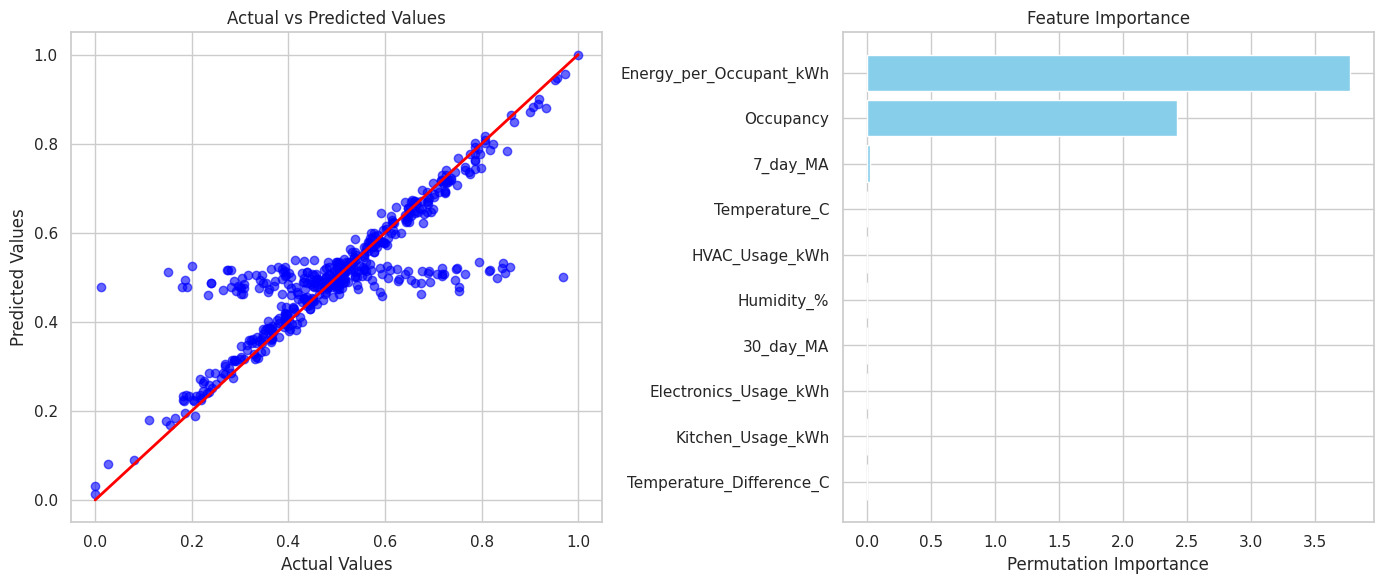

In [ ]:
## ELASTICNET MODEL

# Features to be scaled (excluding 'Occupancy' as it is binary)
numeric_features = ['Temperature_C', 'Humidity_%',
       'HVAC_Usage_kWh', 'Kitchen_Usage_kWh', 'Electronics_Usage_kWh',
       '7_day_MA', '30_day_MA', 'Energy_per_Occupant_kWh',
       'Temperature_Difference_C']
binary_features = ['Occupancy']  # Binary feature that should remain unscaled

# Define imputation strategies for different types of features
numeric_imputer = SimpleImputer(strategy='mean')  # You can use 'median' or other strategies if needed
# Define a column transformer
preprocessor = ColumnTransformer(transformers=[
    ('num', Pipeline(steps=[
        ('imputer', numeric_imputer),  # Handle missing values for numeric features
        ('scaler', StandardScaler())  # Standardize numeric features
    ]), numeric_features),
    ('bin', 'passthrough', binary_features)  # Pass through binary features without scaling
])

elastic_net = ElasticNet(alpha=0.005, l1_ratio=0.07, random_state=42)
# Define the pipeline
pipeline_elastic = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', elastic_net)  # Apply linear regression
])


# Fit the pipeline to the training data
pipeline_elastic.fit(x_train, y_train)

# Make predictions
y_pred_elastic = pipeline_elastic.predict(x_test)

# Evaluate the model
mae_elastic = mean_absolute_error(y_test, y_pred_elastic)
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
rmse_elastic = mse_elastic**0.5  # Square root of MSE
r2_elastic = r2_score(y_test, y_pred_elastic)

# Fancy output
print("\nModel Evaluation Metrics:")
print(f"Mean Absolute Error (MAE)    : {mae_elastic:,.2f}")
print(f"Mean Squared Error (MSE)     : {mse_elastic:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_elastic:,.2f}")
print(f"R-squared (R²)               : {r2_elastic:.4f}")

# Permutation importance
result_elastic = permutation_importance(pipeline_elastic, x_test, y_test, n_repeats=10, random_state=42)

# Sort by importance
sorted_idx_elastic = result_elastic.importances_mean.argsort()

# Create the plots
plt.figure(figsize=(14, 6))

# Subplot 1: Scatter plot of actual vs predicted values
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_elastic, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Reference line y=x
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Subplot 2: Permutation importance plot
plt.subplot(1, 2, 2)
plt.barh(x_test.columns[sorted_idx_elastic], result_elastic.importances_mean[sorted_idx_elastic], color='skyblue')
plt.xlabel("Permutation Importance")
plt.title("Feature Importance")

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()

CONCLUSION

 The evaluation metrics for the models show similar performance across different models. Here’s a summary of the metrics for each model:

Linear Regression:
* MAE: 0.05
* MSE: 0.01
* RMSE: 0.09
* R²: 0.7385

ElasticNet:
* MAE: 0.05
* MSE: 0.01
* RMSE: 0.09
* R²: 0.7386

Ridge Regression:
* MAE: 0.05
* MSE: 0.01
* RMSE: 0.09
* R²: 0.7361

Conclusion:
Performance Similarities:

All models have the same MAE, MSE, and RMSE values, suggesting that the models’ average errors and variability in predictions are very similar.
The R² values are also close, indicating similar levels of explained variance.

Comparative Analysis:

ElasticNet has the highest R² value (0.7386), which means it explains the most variance in the target variable among the three models. This might be a slightly better model in terms of how well it fits the data.

Ridge Regression has a slightly lower R² (0.7361), indicating marginally less explanatory power compared to ElasticNet but still performs similarly in terms of error metrics.
Linear Regression is almost identical to ElasticNet in terms of error metrics and is slightly lower in R², making it very close to the performance of ElasticNet.

Recommendation:
**ElasticNet might be considered the best model** in this case due to its marginally better R² value, which indicates it explains a bit more variance in the data. However, the differences are quite small, so if computational efficiency or model complexity is a concern, **Linear Regression could be a practical choice without sacrificing much performance.**

Ridge Regression is also a strong candidate but shows slightly lower R² compared to ElasticNet. If you prefer a simpler model and the regularization of Ridge Regression fits your needs, it’s a good choice too.